# **1.	Define the Problem**

The project is to developed machine learning models to detect if a credit card transactions is fraudulent or not



# **2.	Collect Data**

The Dataset use for this project is gotten from Kaggle.
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

# **2.1 Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored as style

# **2.2 Importing the Dataset using a Class Function**

In [ ]:
# Download to a local file
output = 'creditcard.csv'  # Name for the downloaded file

# read the downloaded CSV file
df = pd.read_csv('creditcard.csv')

Downloading...
From (original): https://drive.google.com/uc?id=1_lhbsI3FFw8lVngOn0LBnDVwR2I5I6cK
From (redirected): https://drive.google.com/uc?id=1_lhbsI3FFw8lVngOn0LBnDVwR2I5I6cK&confirm=t&uuid=17b10f32-84f4-4bcf-a224-49543d71965d
To: /content/creditcard.csv
100%|██████████| 151M/151M [00:02<00:00, 57.2MB/s]


In [ ]:
# Show the first five rows of the DataFrame
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

We have 5 rows and 31 columns

In [ ]:
# Transpose the first five rows of the DataFrame into columns
df.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [ ]:
# Show the data types of each columns
df.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


No categorical columns in the dataset

In [ ]:
# Show all column names in the DataFrame
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Since all columns are not categorical data assign it to the num_cols variables
num_cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

# **3.	Data Preprocessing**

Data Preprocessing involve preparing the data  handling missing values, removing duplicates, checking and removing outliers before it been train with the model

In [ ]:
class DataPreprocessing:

    def __init__(self, df):
        self.df = df

    # Check for missing values
    def check_missing_values(self):
        return self.df.isnull().sum()

    # Fill missing values (fill with mean for numerical columns and mode for categorical)
    def handle_missing_values(self):
        num_cols = self.df.select_dtypes(include=['number']).columns
        cat_cols = self.df.select_dtypes(include=['object']).columns
        self.df[num_cols] = self.df[num_cols].fillna(self.df[num_cols].mean())
        self.df[cat_cols] = self.df[cat_cols].fillna(self.df[cat_cols].mode().iloc[0])
        return self.df.isnull().sum()  # To check if missing values are handled

    # Check data types
    def check_data_types(self):
        return self.df.dtypes

    # Check for duplicates
    def check_duplicates(self):
        return self.df.duplicated().sum()

    # Remove duplicates
    def handle_duplicates(self):
        self.df = self.df.drop_duplicates()
        return self.df.duplicated().sum()  # Should return 0 after removal

    # Get summary statistics
    def get_summary_statistics(self):
        return self.df.describe()

    # Check for class distribution (assuming 'Class' is the target column)
    def check_class_distribution(self):
        return self.df['Class'].value_counts()

    # Check the number of unique values in each column
    def check_unique_values(self):
        return self.df.nunique()

    # Check for skewness
    def check_skewness(self):
        return self.df.skew()

    # Visualize distributions of numerical features
    def visualize_distributions(self):
        self.df.hist(bins=50, figsize=(20, 15))
        plt.show()

    # Correlation matrix
    def correlation_matrix(self):
        return self.df.corr()

    # Visualize correlation matrix using a heatmap
    def visualize_correlation_matrix(self):
        corr_matrix = self.df.corr()
        plt.figure(figsize=(12, 8))
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
        plt.title("Correlation Matrix")
        plt.show()

    # Check cardinality for categorical columns
    def check_cardinality(self):
        categorical_cols = self.df.select_dtypes(include=['object']).columns
        return self.df[categorical_cols].nunique()

    # Visualize outliers with box plots
    def visualize_outliers(self):
        plt.figure(figsize=(10, 6))
        self.df.boxplot()
        plt.title("Boxplot for Outlier Detection")
        plt.xticks(rotation=90)
        plt.show()

In [ ]:
# Intializing the DataPreprocessing class with the dataset
if __name__ == "__main__":
    dp = DataPreprocessing(df)

**3.1 Check for missing values**

In [ ]:
# The methods can be called like this
missing_values = dp.check_missing_values()
missing_values

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**3.2 Fill the missing values using the mean for numerical columns, and mode for categorical)**

In [ ]:
handle_missing_values = dp.handle_missing_values()
handle_missing_values

Since no missing value no need of calling the function handle_missing_values()

**3.3  Checking data types**

In [ ]:
dp.check_data_types()

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


All columns are numerical

**3.4 Check for duplicates**

In [ ]:
# Check for duplicates
dp.check_duplicates()

1081

We have 1081 duplicate records in the DataFrame

**3.5 Remove duplicates**

In [ ]:
dp.handle_duplicates()

0

**3.6 Get summary statistics**

In [ ]:
dp.get_summary_statistics()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


**3.7 Check for class distribution**

In [ ]:
dp.check_class_distribution()

,count
Class,
0,283253
1,473


The class '0' are more than '1' which indicate the data is highly unbalance

**3.8 Check the number of unique values in each column**

In [ ]:
dp.check_unique_values()

,0
Time,124592
V1,275663
V2,275663
V3,275663
V4,275663
V5,275663
V6,275663
V7,275663
V8,275663
V9,275663


**3.9 Check for skewness**

In [ ]:
dp.check_skewness()

,0
Time,-0.035581
V1,-3.273271
V2,-4.695162
V3,-2.151984
V4,0.671504
V5,-2.414079
V6,1.829880
V7,2.890271
V8,-8.310970
V9,0.537663


**3.10 Visualize distributions of numerical features**

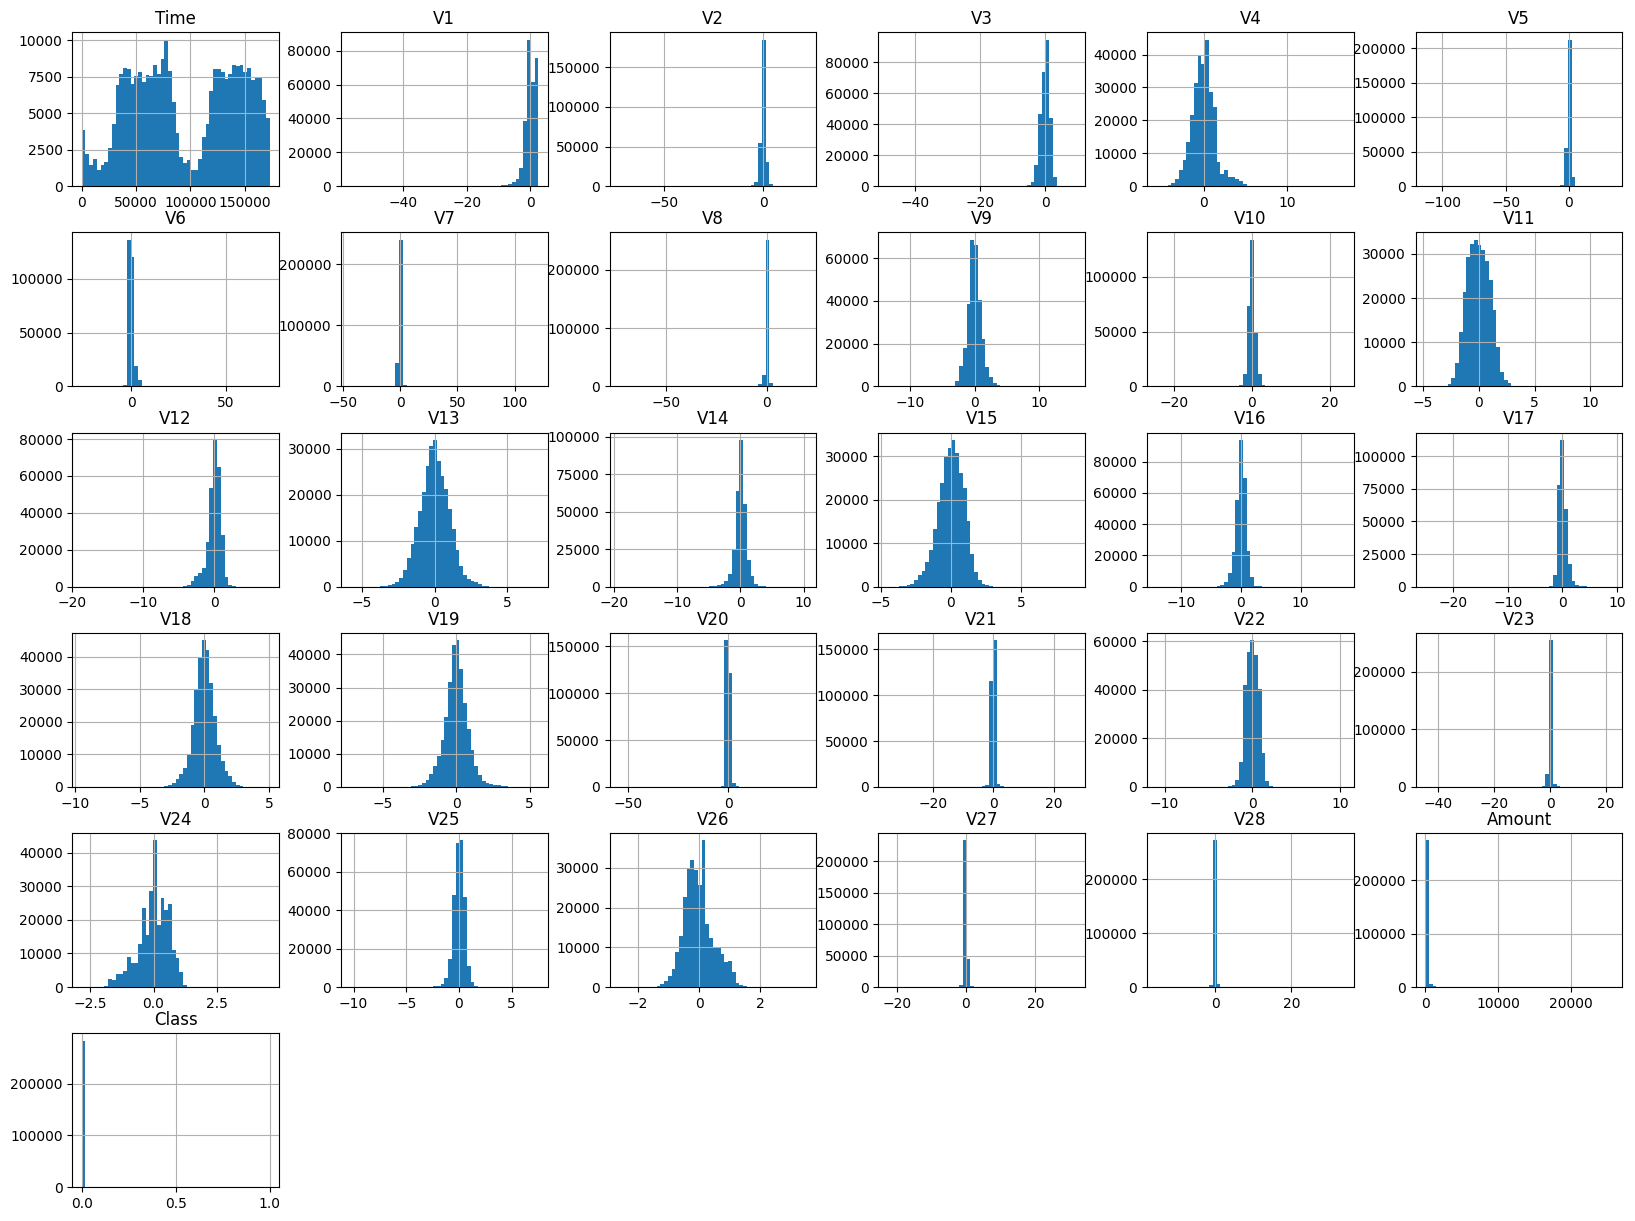

In [ ]:
dp.visualize_distributions()

**3.11 Correlation matrix**

In [ ]:
dp.correlation_matrix()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


**3.12 Visualize correlation matrix using a heatmap**

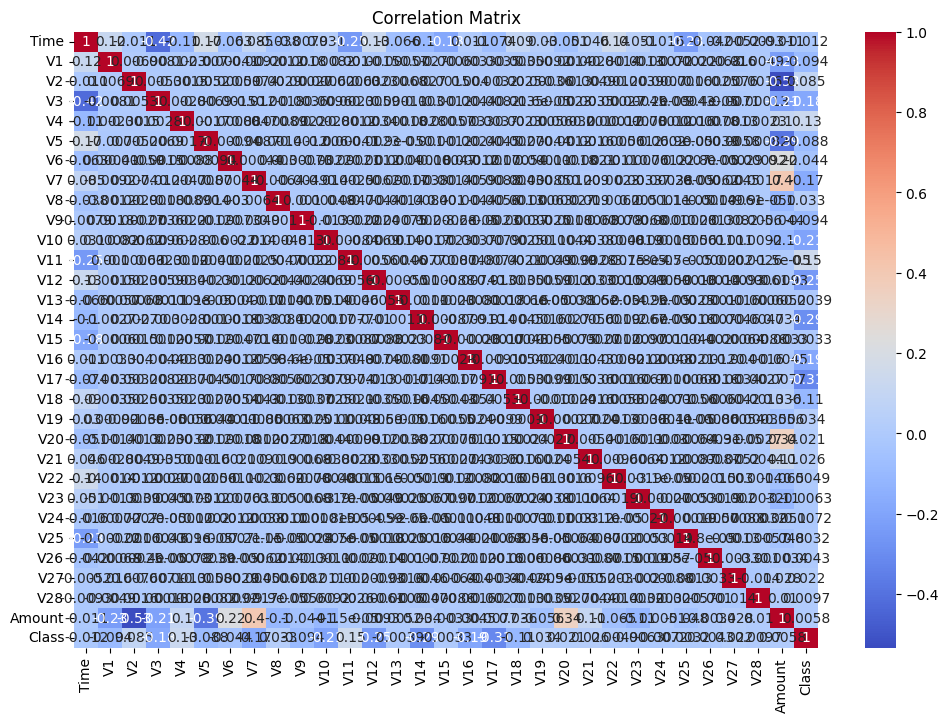

In [ ]:
dp.visualize_correlation_matrix()

**3.13 Check cardinality for categorical columns**

In [ ]:
dp.check_cardinality()

,0


**3.14 Visualize outliers with box plots**

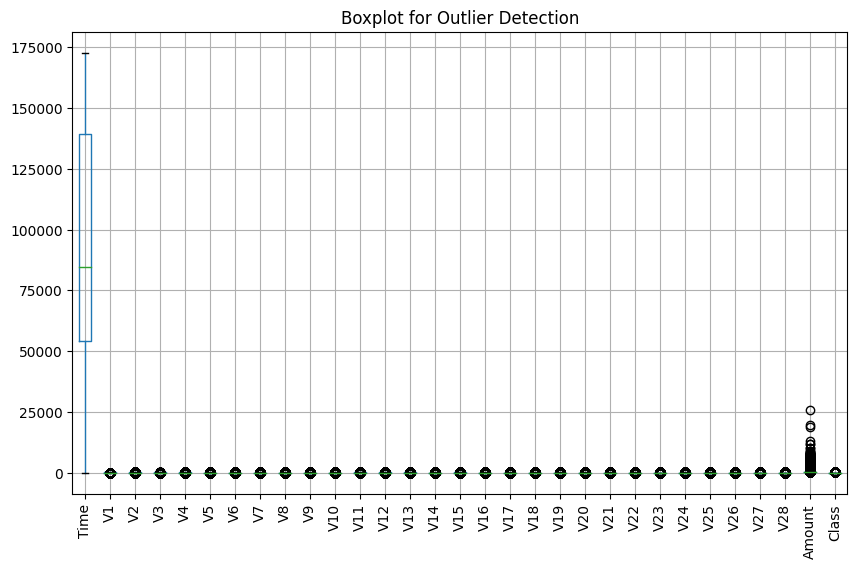

In [ ]:
dp.visualize_outliers()

# **4.	Exploratory Data Analysis (EDA)**

Here the Dataset is analyze to understand trends, patterns and correlations between features which often includes data visualization to get relationships between the features

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [ ]:
class EDA:
    def __init__(self, df):
        self.df = df

    #  Analyze missing values
    def check_missing_values(self):
        """Returns the count of missing values in each column."""
        return self.df.isnull().sum()

    #  Analyze the distribution of the target variable
    def check_class_distribution(self):
        """Returns the distribution of the target variable."""
        return self.df['Class'].value_counts(normalize=True)

    #  Visualize class distribution
    def visualize_class_distribution(self):
        """Visualizes the distribution of the target variable."""
        plt.figure(figsize=(6, 4))
        sns.countplot(data=self.df, x='Class')
        plt.title('Class Distribution (Fraud vs Non-Fraud)')
        plt.show()

    #  Transaction amount distribution for both classes
    def visualize_transaction_amount(self):
        """Visualizes the distribution of transaction amounts by class."""
        plt.figure(figsize=(10, 6))
        sns.histplot(data=self.df, x='Amount', hue='Class', bins=100, kde=True)
        plt.title('Distribution of Transaction Amount by Class')
        plt.show()

    #  Time feature distribution for both classes
    def visualize_time_distribution(self):
        """Visualizes the distribution of transaction time by class."""
        plt.figure(figsize=(10, 6))
        sns.histplot(data=self.df, x='Time', hue='Class', bins=100, kde=True)
        plt.title('Transaction Time Distribution by Class')
        plt.show()

    #  Correlation matrix heatmap
    def correlation_matrix(self):
        """Visualizes the correlation matrix as a heatmap."""
        plt.figure(figsize=(12, 8))
        corr_matrix = self.df.corr()
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
        plt.title('Correlation Matrix Heatmap')
        plt.show()
        return corr_matrix

    #  Skewness check
    def check_skewness(self):
        """Returns the skewness of each numerical feature."""
        return self.df.skew()

    #  Visualize outliers with box plots
    def visualize_outliers(self):
        """Visualizes outliers using box plots."""
        plt.figure(figsize=(10, 6))
        self.df.boxplot()
        plt.title("Boxplot for Outlier Detection")
        plt.xticks(rotation=90)
        plt.show()

    #  Analyze unique values in each column
    def check_unique_values(self):
        """Returns the count of unique values in each column."""
        return self.df.nunique()

    #  Visualize the distribution of numerical features
    def visualize_feature_distributions(self):
        """Visualizes the distribution of numerical features using histograms."""
        self.df.hist(bins=50, figsize=(20, 15))
        plt.show()

    #  Visualize the relationship between time and fraud transactions
    def plot_time_vs_fraud(self):
        """Visualizes the relationship between time and fraudulent transactions."""
        plt.figure(figsize=(10, 6))
        self.df[self.df['Class'] == 1]['Time'].hist(bins=50, alpha=0.5, label='Fraud')
        self.df[self.df['Class'] == 0]['Time'].hist(bins=50, alpha=0.5, label='Non-Fraud')
        plt.title('Time vs Fraud Transactions')
        plt.legend()
        plt.show()

    #  Visualize the relationship between transaction amount and fraud.
    def visualize_amount_vs_fraud(self):
        """Visualizes the relationship between transaction amount and fraud."""
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Class', y='Amount', data=self.df)
        plt.title('Transaction Amount vs Fraud')
        plt.show()

    #  Create pairplots for a subset of features to visualize their relationships with fraud.
    def pairplot_for_features(self, features):
        """Creates pair plots to visualize relationships between features."""
        sns.pairplot(self.df[features + ['Class']], hue='Class', diag_kind='kde')
        plt.show()

# Create an instance of the EDA class
eda = EDA(df)

**4.1 Analyze missing values**

In [ ]:
eda.check_missing_values()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


No missing values for each of the columns

**4.2 Analyze the distribution of the target variable**

In [ ]:
eda.check_class_distribution()

,proportion
Class,
0,0.998273
1,0.001727


This shows the imbalance of the Class column

**4.3 Visualize class distribution**

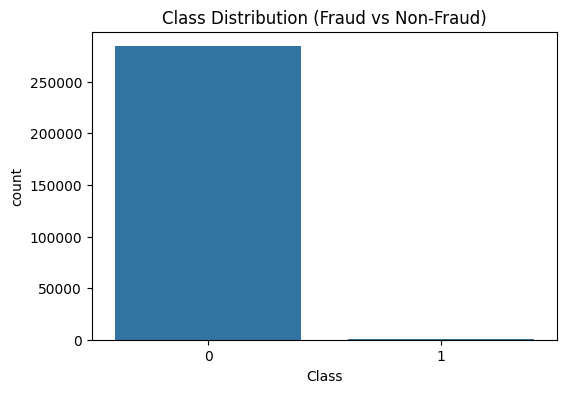

In [ ]:
eda.visualize_class_distribution()

The Class '0' are far more than '1'

**4.4 Transaction amount distribution for both classes**

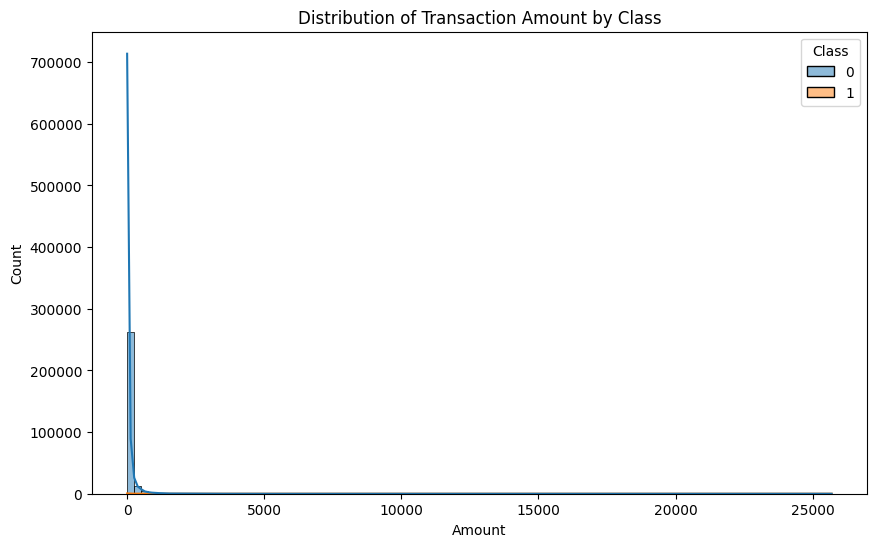

In [ ]:
eda.visualize_transaction_amount()

**4.5 Time feature distribution for both classes**

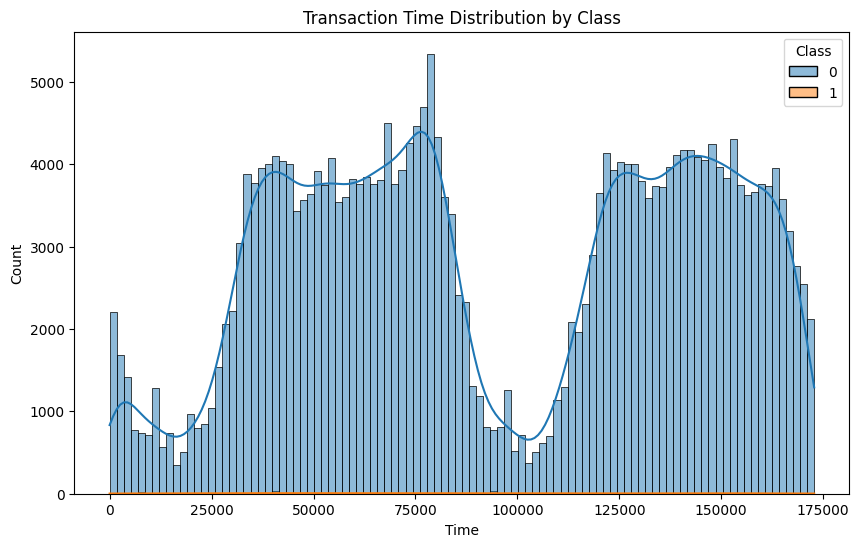

In [ ]:
eda.visualize_time_distribution()

**4.6 Correlation matrix heatmap**

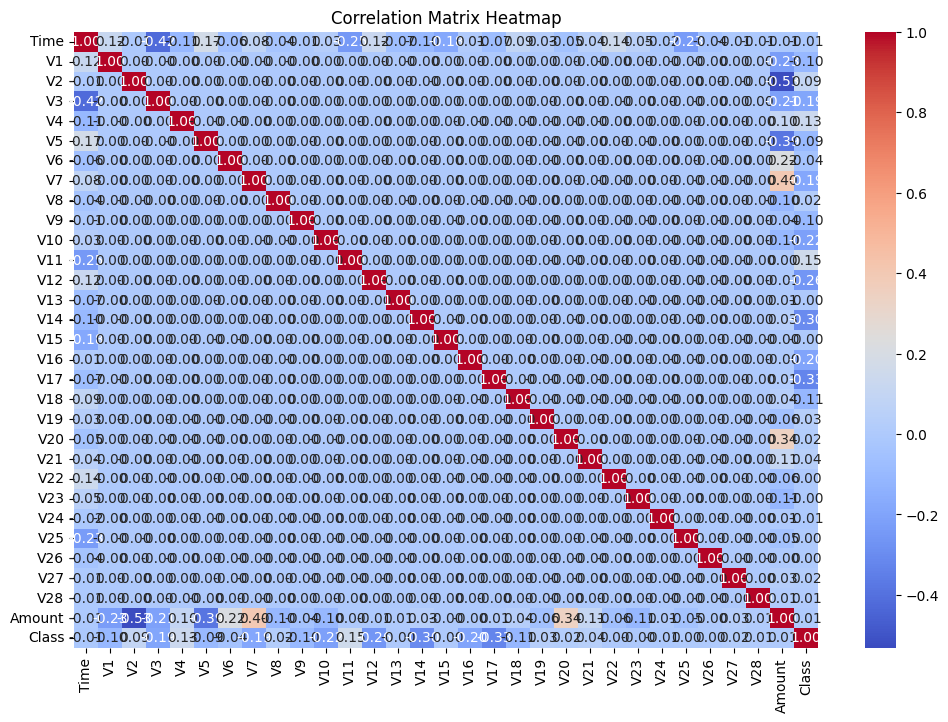

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [ ]:
eda.correlation_matrix()

**4.7 Skewness check**

In [ ]:
eda.check_skewness()

,0
Time,-0.035568
V1,-3.280667
V2,-4.624866
V3,-2.240155
V4,0.676292
V5,-2.425901
V6,1.826581
V7,2.553907
V8,-8.521944
V9,0.554680


**4.8 Visualize outliers with box plots**

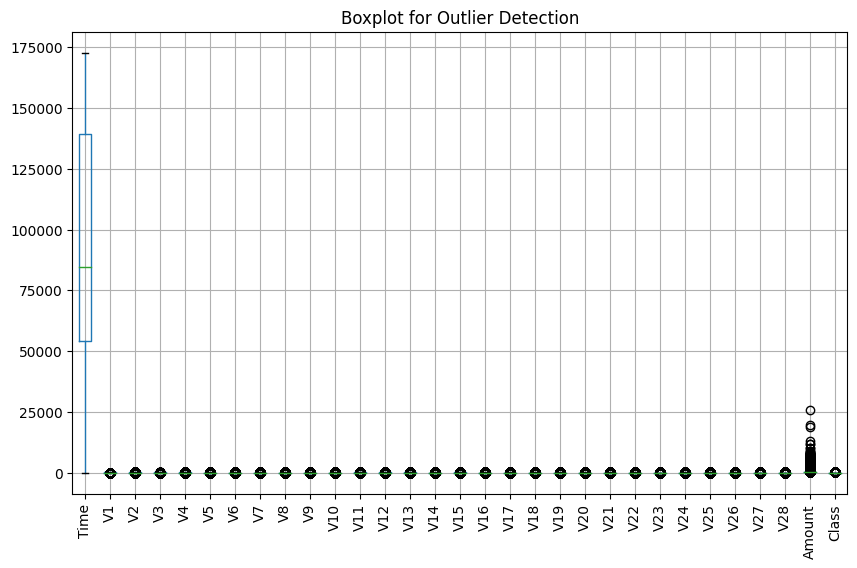

In [ ]:
eda.visualize_outliers()

**4.9 Analyze unique values in each column**

In [ ]:
eda.check_unique_values()

,0
Time,124592
V1,275663
V2,275663
V3,275663
V4,275663
V5,275663
V6,275663
V7,275663
V8,275663
V9,275663


**4.10 Visualize the distribution of numerical features**

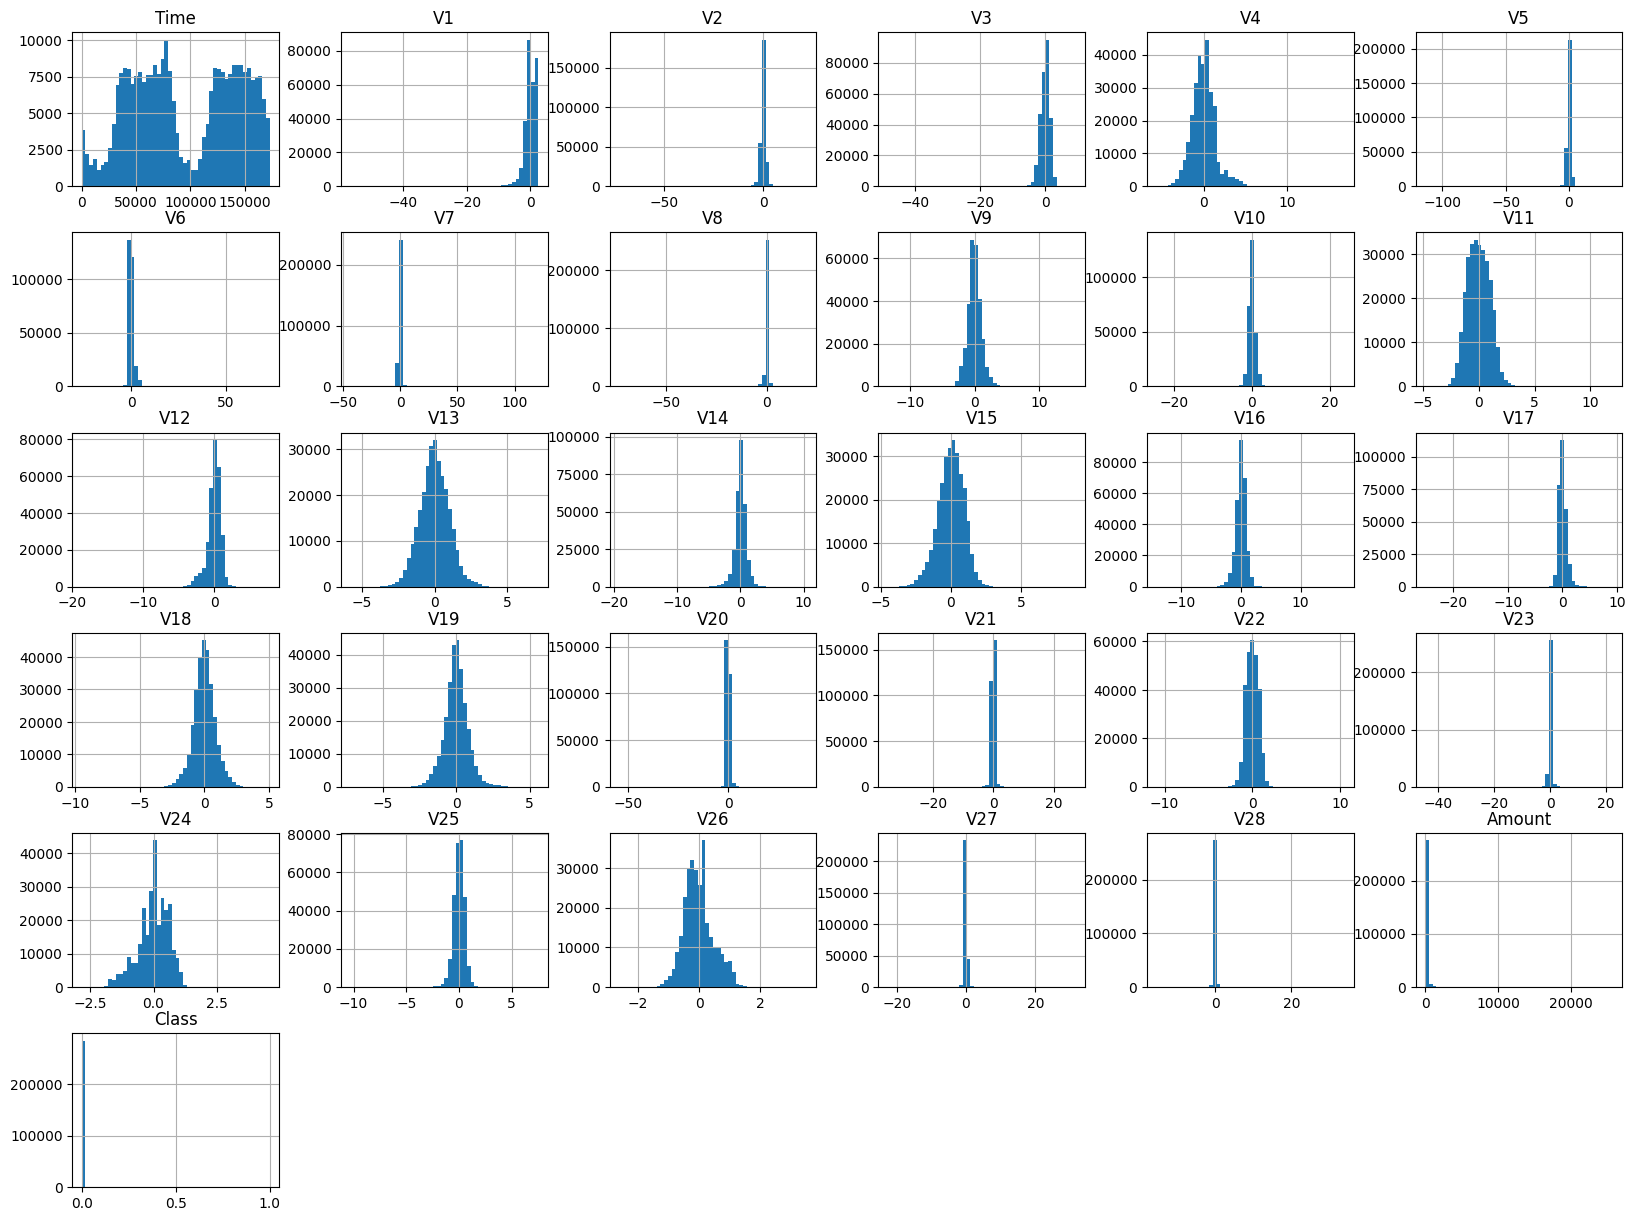

In [ ]:
eda.visualize_feature_distributions()

**4.11 Visualize the relationship between time and fraud transactions**

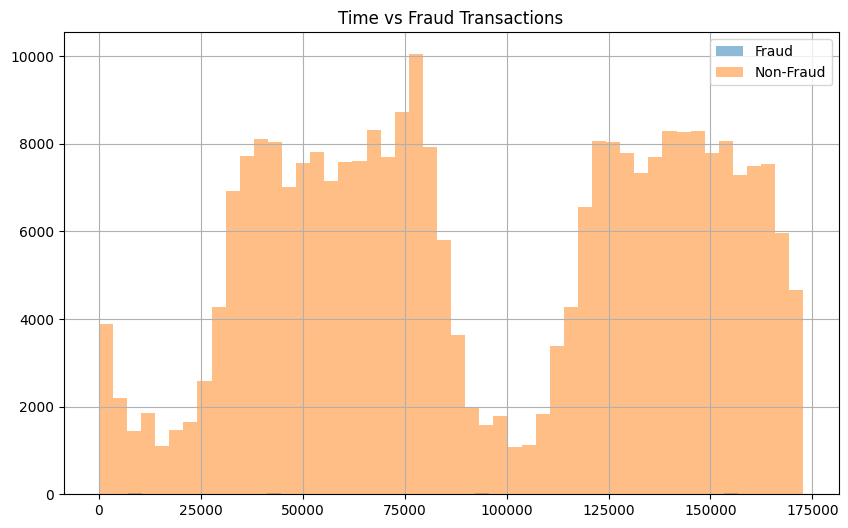

In [ ]:
eda.plot_time_vs_fraud()

**4.12 Visualize the relationship between transaction amount and fraud**

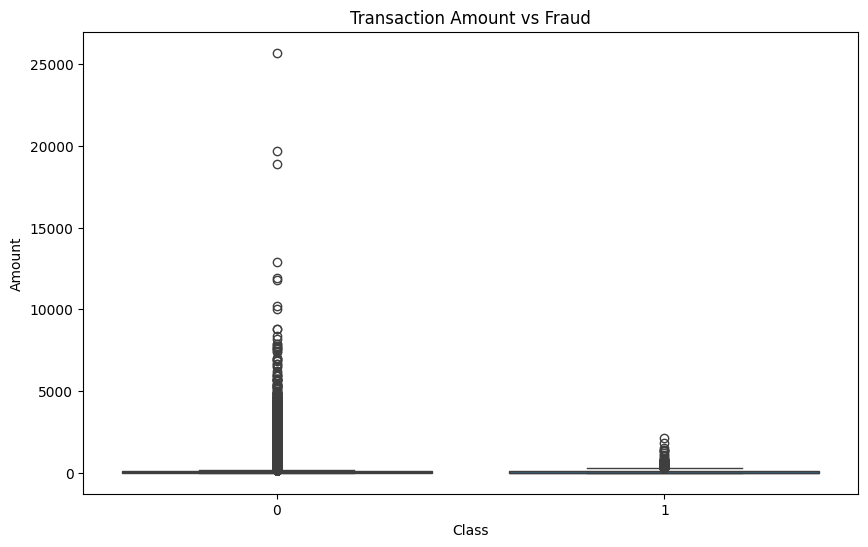

In [ ]:
eda.visualize_amount_vs_fraud()

**4.13 Create pairplots for a subset of features to visualize their relationships with fraud.**

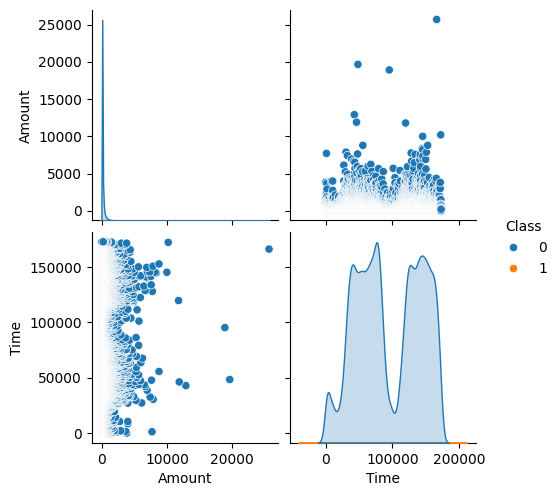

In [ ]:
# Adjust features as necessary
eda.pairplot_for_features(['Amount', 'Time'])

# **5.	Feature Selection/Engineering**

**5.1 Droping Time Attribute**

Time attribute is dropped, when building the models, and may not impact our target variable.

In [ ]:
df.drop('Time', axis=1, inplace=True)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**5.2 Now, X and y are our normal datasets**

In [ ]:
X_normal = df.drop('Class', axis=1)
y_normal = df['Class']
X_normal.shape, y_normal.shape

((284807, 29), (284807,))

**5.3 Normalizing the AMOUNT attribute values using STANDARDSCALAR**

In [ ]:
temp_df = df.copy()

from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
amount = temp_df['Amount'].values
temp_df['Amount'] = standard.fit_transform(amount.reshape(-1,1))
X_scaled = temp_df.drop('Class', axis=1)
y_scaled = temp_df['Class']
X_scaled.shape, y_scaled.shape

((284807, 29), (284807,))

**5.4 Handling Imbalanced Datasets**

* Oversampling the Minority Class: Copy or generate new samples to increase the instances of the minority class (frauds).
* Undersampling the Majority Class: Remove some samples to decrease the number of majority class instances (non-fraud cases).
* SMOTE (Synthetic Minority Over-sampling Technique): Create synthetic samples for the minority class by interpolation with its neighbouring points.

**5.4.1 OverSampling**

In [ ]:
df.Class.value_counts()

,count
Class,
0,284315
1,492


In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = df[(df['Class']==0)]
df_minority = df[(df['Class']==1)]

# upsample minority class
df_minority_oversampled = resample(df_minority,
                                 replace=True,
                                 n_samples=284315,
                                 random_state=42)
# Combine majority class with upsampled minority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
df_oversampled.Class.value_counts()

,count
Class,
1,284315
0,284315


**Final Sampled Dataset**

In [ ]:
X_over = df_oversampled.drop('Class', axis=1)
y_over = df_oversampled['Class']
X_over.shape, y_over.shape

((568630, 29), (568630,))

**5.4.2 Undersampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42)

X_under, y_under = rus.fit_resample(X_normal, y_normal)
print(f"The number of Classes before the fit {Counter(y_normal)}")
print(f"The number of Classes after the fit {Counter(y_under)}")

The number of Classes before the fit Counter({0: 284315, 1: 492})
The number of Classes after the fit Counter({0: 492, 1: 492})


**5.4.3 SMOTE(Synthetic Minority Oversampling Technique)**

In [ ]:
from imblearn.over_sampling import SMOTE

# Resampling the minority class. The strategy can be changed as required.

sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.

X_smote, y_smote = sm.fit_resample(df.drop('Class', axis=1), df['Class'])
smote_df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
X_smote.shape

(568630, 29)

# **END**

# **6.0 Model Development Process**

**6.1 Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

class LogisticRegressionModelDevelopment:

    def __init__(self, X_normal, y_normal, X_scaled, y_scaled, X_under, y_under, X_over, y_over, X_smote, y_smote):
        # Initialize the datasets
        self.datasets = {
            'normal': (X_normal, y_normal),
            'scaled': (X_scaled, y_scaled),
            'undersampled': (X_under, y_under),
            'oversampled': (X_over, y_over),
            'smote': (X_smote, y_smote)
        }
        # Initialize Logistic Regression model
        self.model = LogisticRegression(max_iter=1000)

    def fit_and_evaluate(self, dataset_type='normal'):
        # Fit the Logistic Regression model and evaluate it on the chosen dataset
        X, y = self.datasets[dataset_type]
        self.model.fit(X, y)
        y_pred = self.model.predict(X)

        # Output accuracy and classification report
        accuracy = accuracy_score(y, y_pred)
        print(f"Accuracy on {dataset_type} dataset: {accuracy:.4f}")
        print(classification_report(y, y_pred))

        # Confusion matrix visualization
        cm = confusion_matrix(y, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - {dataset_type.capitalize()} Dataset')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

In [ ]:
# Example usage with preprocessed datasets (X_normal, y_normal, X_scaled, y_scaled, etc.)
log_reg_model_dev = LogisticRegressionModelDevelopment(X_normal, y_normal, X_scaled, y_scaled, X_under, y_under, X_over, y_over, X_smote, y_smote)

Accuracy on normal dataset: 0.9992
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.89      0.63      0.74       492

    accuracy                           1.00    284807
   macro avg       0.94      0.82      0.87    284807
weighted avg       1.00      1.00      1.00    284807



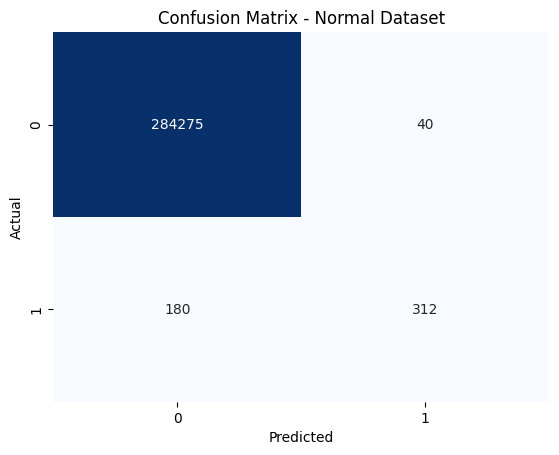

In [ ]:
# Fit and evaluate on the 'normal' dataset
log_reg_model_dev.fit_and_evaluate('normal')

Accuracy on scaled dataset: 0.9992
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.88      0.63      0.73       492

    accuracy                           1.00    284807
   macro avg       0.94      0.81      0.87    284807
weighted avg       1.00      1.00      1.00    284807



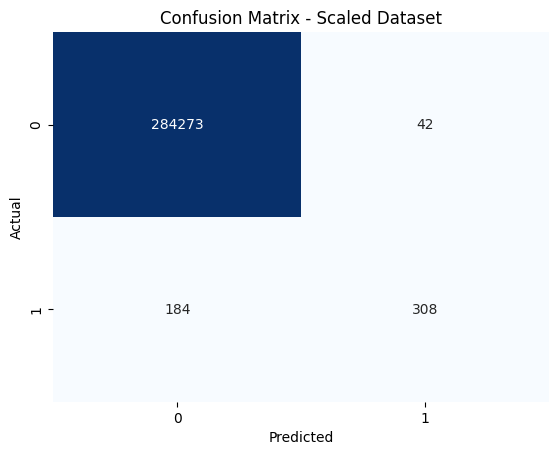

In [ ]:
# Fit and evaluate on the 'scaled' dataset
log_reg_model_dev.fit_and_evaluate('scaled')

Accuracy on undersampled dataset: 0.9543
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       492
           1       0.98      0.93      0.95       492

    accuracy                           0.95       984
   macro avg       0.96      0.95      0.95       984
weighted avg       0.96      0.95      0.95       984



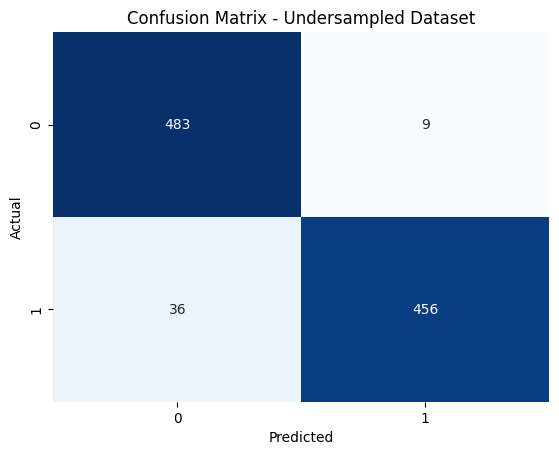

In [ ]:
# Fit and evaluate on the 'undersampled' dataset
log_reg_model_dev.fit_and_evaluate('undersampled')

Accuracy on oversampled dataset: 0.9490
              precision    recall  f1-score   support

           0       0.93      0.98      0.95    284315
           1       0.98      0.92      0.95    284315

    accuracy                           0.95    568630
   macro avg       0.95      0.95      0.95    568630
weighted avg       0.95      0.95      0.95    568630



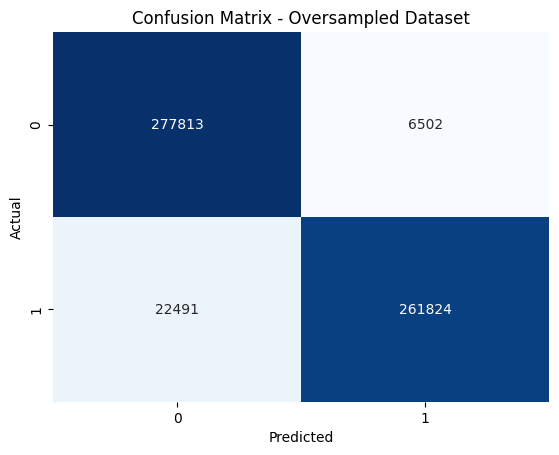

In [ ]:
# Fit and evaluate on the 'oversampled' dataset
log_reg_model_dev.fit_and_evaluate('oversampled')

Accuracy on smote dataset: 0.9598
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    284315
           1       0.98      0.94      0.96    284315

    accuracy                           0.96    568630
   macro avg       0.96      0.96      0.96    568630
weighted avg       0.96      0.96      0.96    568630



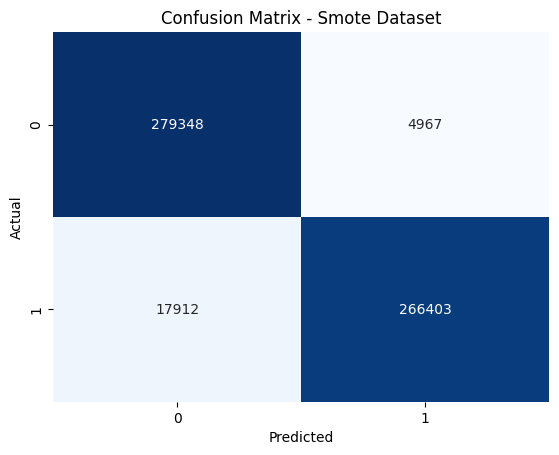

In [ ]:
# Fit and evaluate on the 'smote' dataset
log_reg_model_dev.fit_and_evaluate('smote')

**6.1.1 Conclusion on Logistic Regression Model**

The model achieves high accuracy on the normal dataset but performs better when detecting fraud using undersampling, oversampling or SMOTE datasets.

**6.2 Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

class RandomForestModelDevelopment:

    def __init__(self, X_normal, y_normal, X_scaled, y_scaled, X_under, y_under, X_over, y_over, X_smote, y_smote):
        # Initialize the datasets
        self.datasets = {
            'normal': (X_normal, y_normal),
            'scaled': (X_scaled, y_scaled),
            'undersampled': (X_under, y_under),
            'oversampled': (X_over, y_over),
            'smote': (X_smote, y_smote)
        }
        # Simple random forest with fewer trees for faster execution
        self.model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1)

    def fit_and_evaluate(self, dataset_type='normal'):
        # Fit the model and evaluate it on the chosen dataset
        X, y = self.datasets[dataset_type]
        self.model.fit(X, y)
        y_pred = self.model.predict(X)

        # Output accuracy and classification report
        accuracy = accuracy_score(y, y_pred)
        print(f"Accuracy on {dataset_type} dataset: {accuracy:.4f}")
        print(classification_report(y, y_pred))

        # Confusion matrix visualization
        cm = confusion_matrix(y, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - {dataset_type.capitalize()} Dataset')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

In [ ]:
# Example usage with preprocessed datasets (X_normal, y_normal, X_scaled, y_scaled, etc.)
rf_model_dev = RandomForestModelDevelopment(X_normal, y_normal, X_scaled, y_scaled, X_under, y_under, X_over, y_over, X_smote, y_smote)

Accuracy on normal dataset: 0.9997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      0.84      0.91       492

    accuracy                           1.00    284807
   macro avg       1.00      0.92      0.96    284807
weighted avg       1.00      1.00      1.00    284807



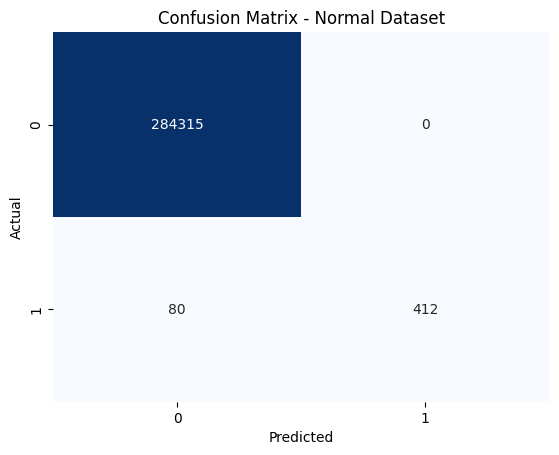

In [ ]:
# Fit and evaluate on the 'normal' dataset
rf_model_dev.fit_and_evaluate('normal')

Accuracy on scaled dataset: 0.9997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      0.83      0.91       492

    accuracy                           1.00    284807
   macro avg       1.00      0.92      0.95    284807
weighted avg       1.00      1.00      1.00    284807



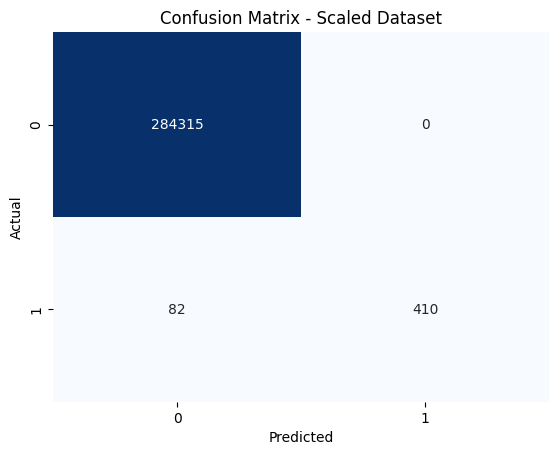

In [ ]:
# Fit and evaluate on the 'scaled' dataset
rf_model_dev.fit_and_evaluate('scaled')

Accuracy on undersampled dataset: 0.9898
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       492
           1       1.00      0.98      0.99       492

    accuracy                           0.99       984
   macro avg       0.99      0.99      0.99       984
weighted avg       0.99      0.99      0.99       984



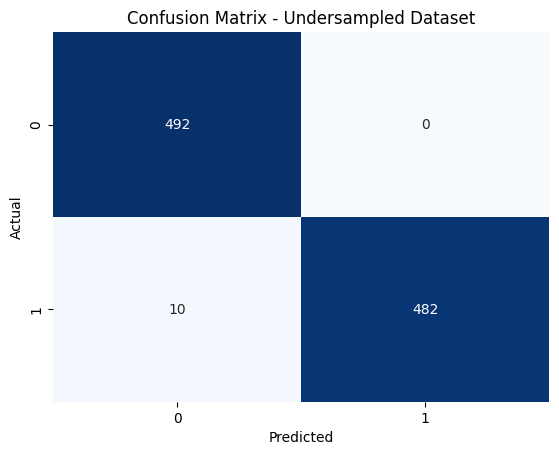

In [ ]:
# Fit and evaluate on the 'undersampled' dataset
rf_model_dev.fit_and_evaluate('undersampled')

Accuracy on oversampled dataset: 0.9926
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    284315
           1       1.00      0.99      0.99    284315

    accuracy                           0.99    568630
   macro avg       0.99      0.99      0.99    568630
weighted avg       0.99      0.99      0.99    568630



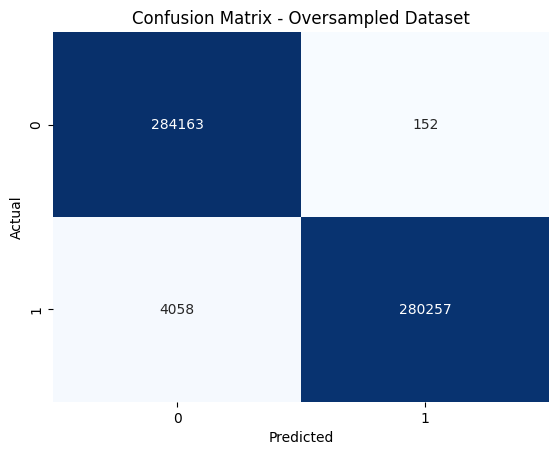

In [ ]:
# Fit and evaluate on the 'oversampled' dataset
rf_model_dev.fit_and_evaluate('oversampled')

Accuracy on smote dataset: 0.9867
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    284315
           1       1.00      0.97      0.99    284315

    accuracy                           0.99    568630
   macro avg       0.99      0.99      0.99    568630
weighted avg       0.99      0.99      0.99    568630



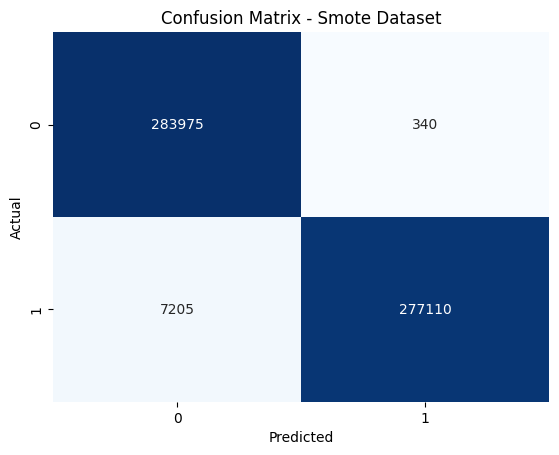

In [ ]:
# Fit and evaluate on the 'smote' dataset
rf_model_dev.fit_and_evaluate('smote')

**6.2.1 Conclusion on RandomForestClassifier Model**

The Random Forest Model performed well across all datasets but with lower recall values on unbalanced datasets (normal and scaled). Balanced datasets such as undersampled, oversampled, or SMOTE generally offered better detection rates for fraud.

**6.3 KNeighborsClassifier Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

class KNeighborsModelDevelopment:

    def __init__(self, X_normal, y_normal, X_scaled, y_scaled, X_under, y_under, X_over, y_over, X_smote, y_smote, n_neighbors=5):
        # Initialize the datasets
        self.datasets = {
            'normal': (X_normal, y_normal),
            'scaled': (X_scaled, y_scaled),
            'undersampled': (X_under, y_under),
            'oversampled': (X_over, y_over),
            'smote': (X_smote, y_smote)
        }
        # Initialize KNeighborsClassifier with the number of neighbors
        self.model = KNeighborsClassifier(n_neighbors=n_neighbors)

    def fit_and_evaluate(self, dataset_type='normal'):
        # Fit the KNeighborsClassifier and evaluate it on the chosen dataset
        X, y = self.datasets[dataset_type]
        self.model.fit(X, y)
        y_pred = self.model.predict(X)

        # Output accuracy and classification report
        accuracy = accuracy_score(y, y_pred)
        print(f"Accuracy on {dataset_type} dataset: {accuracy:.4f}")
        print(classification_report(y, y_pred))

        # Confusion matrix visualization
        cm = confusion_matrix(y, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - {dataset_type.capitalize()} Dataset')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

In [ ]:
# Example usage with preprocessed datasets (X_normal, y_normal, X_scaled, y_scaled, etc.)
knn_model_dev = KNeighborsModelDevelopment(X_normal, y_normal, X_scaled, y_scaled, X_under, y_under, X_over, y_over, X_smote, y_smote, n_neighbors=3)

Accuracy on normal dataset: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.96      0.77      0.85       492

    accuracy                           1.00    284807
   macro avg       0.98      0.89      0.93    284807
weighted avg       1.00      1.00      1.00    284807



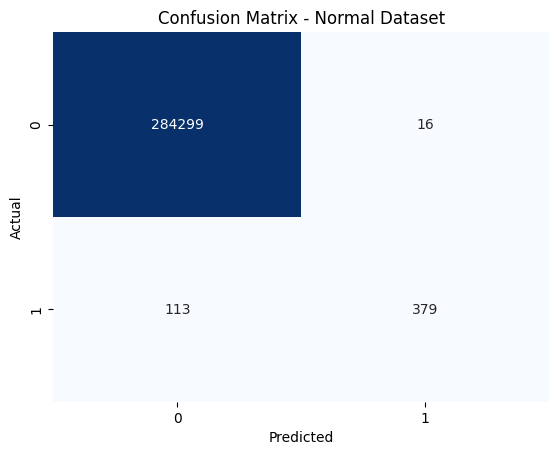

In [ ]:
# Fit and evaluate on the 'normal' dataset
knn_model_dev.fit_and_evaluate('normal')

Accuracy on scaled dataset: 0.9997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.98      0.82      0.89       492

    accuracy                           1.00    284807
   macro avg       0.99      0.91      0.95    284807
weighted avg       1.00      1.00      1.00    284807



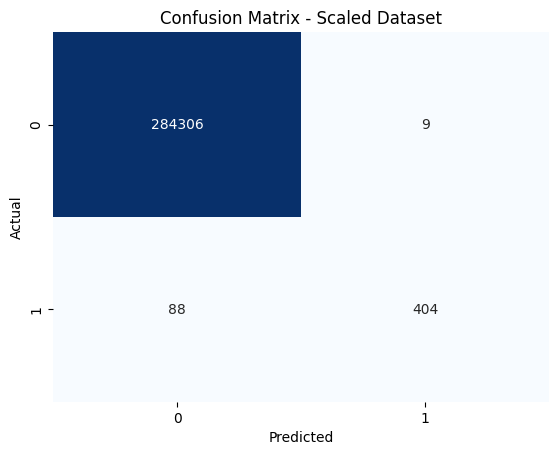

In [ ]:
# Fit and evaluate on the 'scaled' dataset
knn_model_dev.fit_and_evaluate('scaled')

Accuracy on undersampled dataset: 0.9472
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       492
           1       0.97      0.92      0.95       492

    accuracy                           0.95       984
   macro avg       0.95      0.95      0.95       984
weighted avg       0.95      0.95      0.95       984



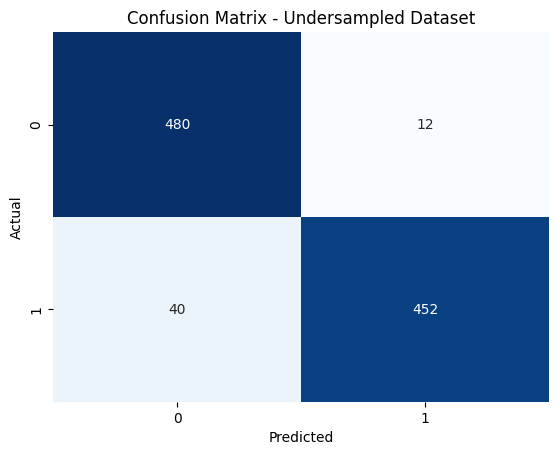

In [ ]:
# Fit and evaluate on the 'undersampled' dataset
knn_model_dev.fit_and_evaluate('undersampled')

Accuracy on oversampled dataset: 0.9999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      1.00      1.00    284315

    accuracy                           1.00    568630
   macro avg       1.00      1.00      1.00    568630
weighted avg       1.00      1.00      1.00    568630



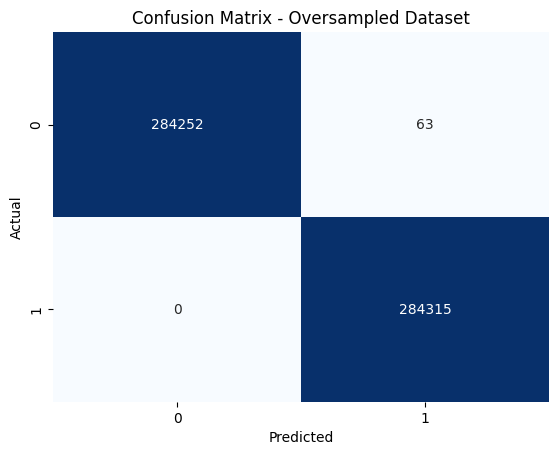

In [ ]:
# Fit and evaluate on the 'oversampled' dataset
knn_model_dev.fit_and_evaluate('oversampled')

Accuracy on smote dataset: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      1.00      1.00    284315

    accuracy                           1.00    568630
   macro avg       1.00      1.00      1.00    568630
weighted avg       1.00      1.00      1.00    568630



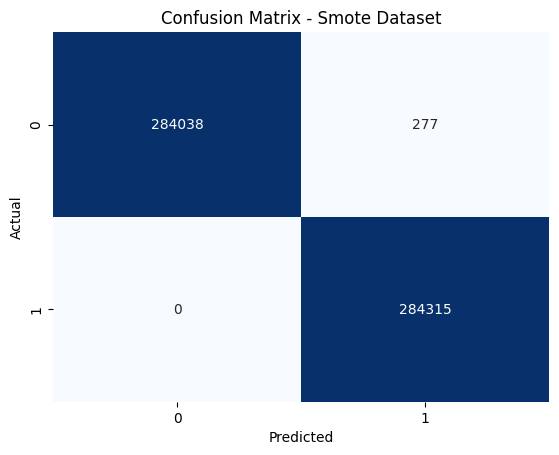

In [ ]:
# Fit and evaluate on the 'smote' dataset
knn_model_dev.fit_and_evaluate('smote')

**6.3.1 Conclusion on KNeighborsClassifier Model**

The KNeighborsClassifier Model performs well, especially on balanced datasets like oversampled and SMOTE (i.e., it almost perfectly detected all fraud attributes). In contrast, the normal and scaled dataset slightly reduces fraud recall.

**6.4 Naive Bayes Classifier Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

class NaiveBayesModelDevelopment:

    def __init__(self, X_normal, y_normal, X_scaled, y_scaled, X_under, y_under, X_over, y_over, X_smote, y_smote):
        # Initialize the datasets
        self.datasets = {
            'normal': (X_normal, y_normal),
            'scaled': (X_scaled, y_scaled),
            'undersampled': (X_under, y_under),
            'oversampled': (X_over, y_over),
            'smote': (X_smote, y_smote)
        }
        # Initialize Gaussian Naive Bayes model
        self.model = GaussianNB()

    def fit_and_evaluate(self, dataset_type='normal'):
        # Fit the Naive Bayes model and evaluate it on the chosen dataset
        X, y = self.datasets[dataset_type]
        self.model.fit(X, y)
        y_pred = self.model.predict(X)

        # Output accuracy and classification report
        accuracy = accuracy_score(y, y_pred)
        print(f"Accuracy on {dataset_type} dataset: {accuracy:.4f}")
        print(classification_report(y, y_pred))

        # Confusion matrix visualization
        cm = confusion_matrix(y, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - {dataset_type.capitalize()} Dataset')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

In [ ]:
# Example usage with preprocessed datasets (X_normal, y_normal, X_scaled, y_scaled, etc.)
naive_bayes_model_dev = NaiveBayesModelDevelopment(X_normal, y_normal, X_scaled, y_scaled, X_under, y_under, X_over, y_over, X_smote, y_smote)

Accuracy on normal dataset: 0.9778
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.06      0.83      0.11       492

    accuracy                           0.98    284807
   macro avg       0.53      0.90      0.55    284807
weighted avg       1.00      0.98      0.99    284807



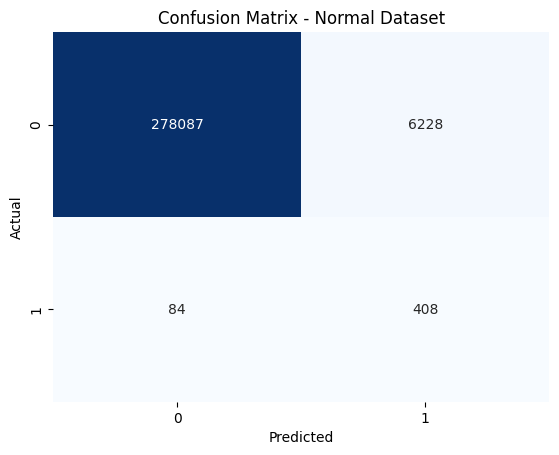

In [ ]:
# Fit and evaluate on the 'normal' dataset
naive_bayes_model_dev.fit_and_evaluate('normal')

Accuracy on scaled dataset: 0.9778
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.06      0.83      0.11       492

    accuracy                           0.98    284807
   macro avg       0.53      0.90      0.55    284807
weighted avg       1.00      0.98      0.99    284807



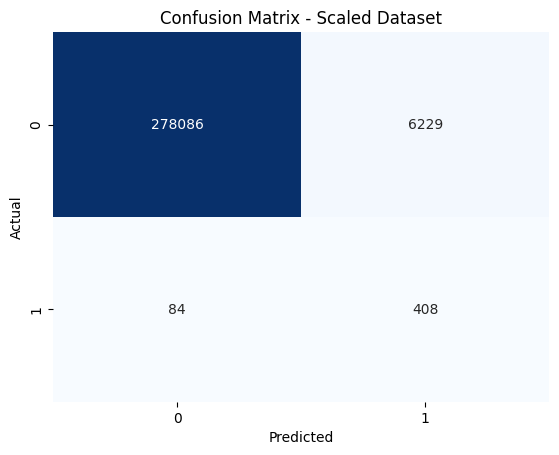

In [ ]:
# Fit and evaluate on the 'scaled' dataset
naive_bayes_model_dev.fit_and_evaluate('scaled')

Accuracy on undersampled dataset: 0.9177
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       492
           1       0.96      0.87      0.91       492

    accuracy                           0.92       984
   macro avg       0.92      0.92      0.92       984
weighted avg       0.92      0.92      0.92       984



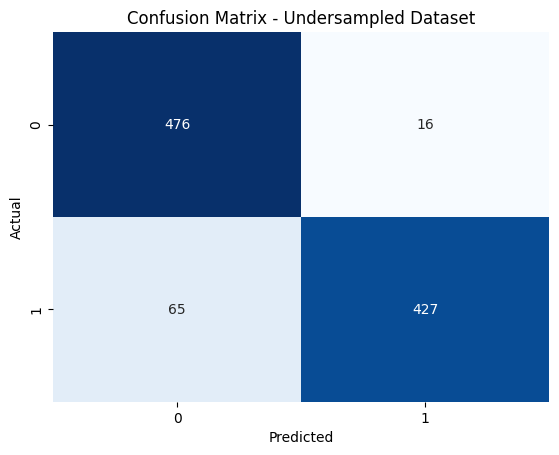

In [ ]:
# Fit and evaluate on the 'undersampled' dataset
naive_bayes_model_dev.fit_and_evaluate('undersampled')

Accuracy on oversampled dataset: 0.9171
              precision    recall  f1-score   support

           0       0.87      0.97      0.92    284315
           1       0.97      0.86      0.91    284315

    accuracy                           0.92    568630
   macro avg       0.92      0.92      0.92    568630
weighted avg       0.92      0.92      0.92    568630



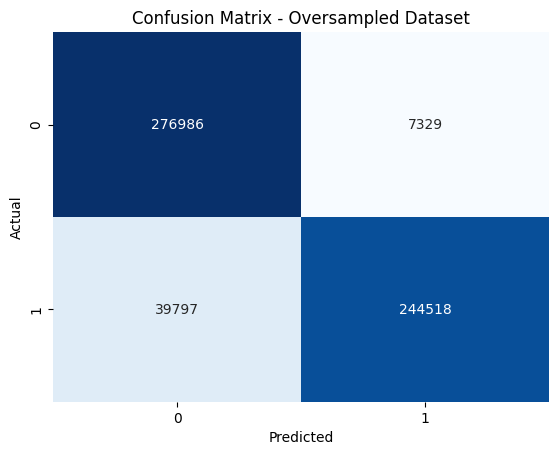

In [ ]:
# Fit and evaluate on the 'oversampled' dataset
naive_bayes_model_dev.fit_and_evaluate('oversampled')

Accuracy on smote dataset: 0.9188
              precision    recall  f1-score   support

           0       0.88      0.97      0.92    284315
           1       0.97      0.86      0.91    284315

    accuracy                           0.92    568630
   macro avg       0.92      0.92      0.92    568630
weighted avg       0.92      0.92      0.92    568630



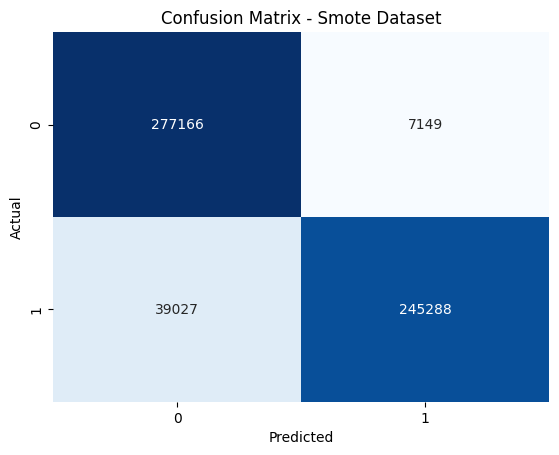

In [ ]:
# Fit and evaluate on the 'smote' dataset
naive_bayes_model_dev.fit_and_evaluate('smote')

**6.4.1 Conclusion on Naive Bayes Classifier Model**

The balanced datasets such as the undersampling, oversampling and SMOTE help improve fraud detection within the Naive Bayes classifier. The performance on the original (imbalanced) dataset fails to perform well with low precision and f1-scores for fraud cases.

**6.5 XGBoost Classifier Model**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


class XGBoostModelDevelopment:

    def __init__(self, X_normal, y_normal, X_scaled, y_scaled, X_under, y_under, X_over, y_over, X_smote, y_smote):
        # Initialize the datasets
        self.datasets = {
            'normal': (X_normal, y_normal),
            'scaled': (X_scaled, y_scaled),
            'undersampled': (X_under, y_under),
            'oversampled': (X_over, y_over),
            'smote': (X_smote, y_smote)
        }
        # Initialize XGBoost classifier with recommended settings
        self.model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0)

    def fit_and_evaluate(self, dataset_type='normal'):
        # Fit the XGBoost model and evaluate it on the chosen dataset
        X, y = self.datasets[dataset_type]
        self.model.fit(X, y)
        y_pred = self.model.predict(X)

        # Output accuracy and classification report
        accuracy = accuracy_score(y, y_pred)
        print(f"Accuracy on {dataset_type} dataset: {accuracy:.4f}")
        print(classification_report(y, y_pred))

        # Confusion matrix visualization
        cm = confusion_matrix(y, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - {dataset_type.capitalize()} Dataset')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

In [ ]:
# Example usage with preprocessed datasets (X_normal, y_normal, X_scaled, y_scaled, etc.)
xgboost_model_dev = XGBoostModelDevelopment(X_normal, y_normal, X_scaled, y_scaled, X_under, y_under, X_over, y_over, X_smote, y_smote)

Accuracy on normal dataset: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      1.00      1.00       492

    accuracy                           1.00    284807
   macro avg       1.00      1.00      1.00    284807
weighted avg       1.00      1.00      1.00    284807



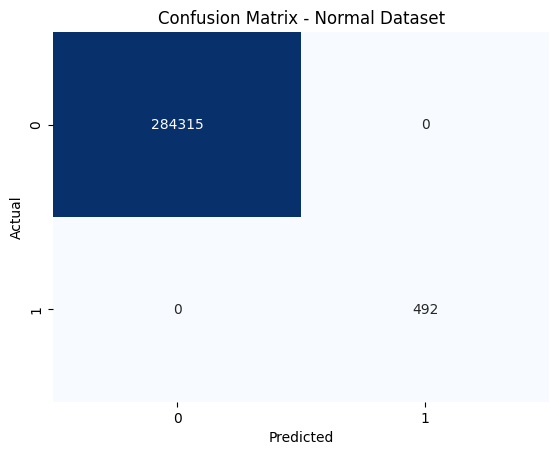

In [ ]:
# Fit and evaluate on the 'normal' dataset
xgboost_model_dev.fit_and_evaluate('normal')

Accuracy on scaled dataset: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      1.00      1.00       492

    accuracy                           1.00    284807
   macro avg       1.00      1.00      1.00    284807
weighted avg       1.00      1.00      1.00    284807



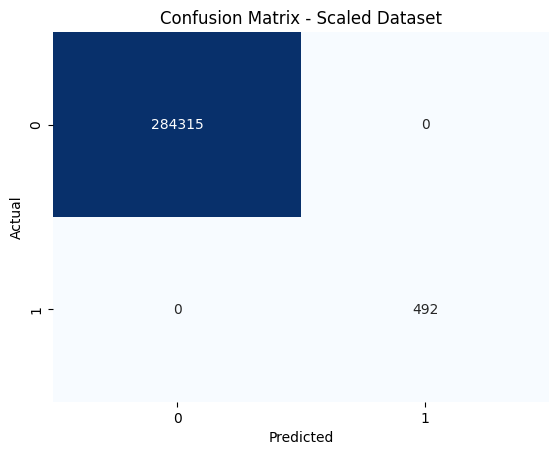

In [ ]:
# Fit and evaluate on the 'scaled' dataset
xgboost_model_dev.fit_and_evaluate('scaled')

Accuracy on undersampled dataset: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       492
           1       1.00      1.00      1.00       492

    accuracy                           1.00       984
   macro avg       1.00      1.00      1.00       984
weighted avg       1.00      1.00      1.00       984



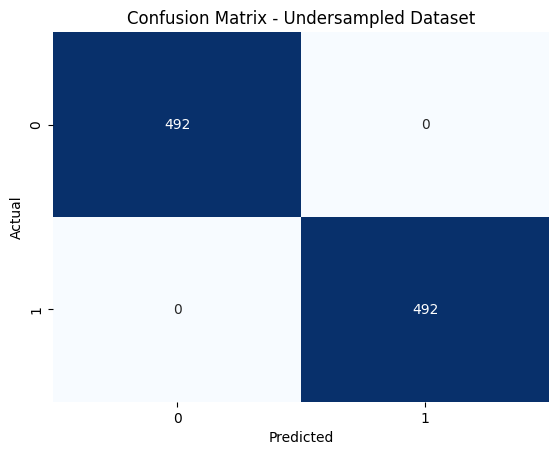

In [ ]:
# Fit and evaluate on the 'undersampled' dataset
xgboost_model_dev.fit_and_evaluate('undersampled')

Accuracy on oversampled dataset: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      1.00      1.00    284315

    accuracy                           1.00    568630
   macro avg       1.00      1.00      1.00    568630
weighted avg       1.00      1.00      1.00    568630



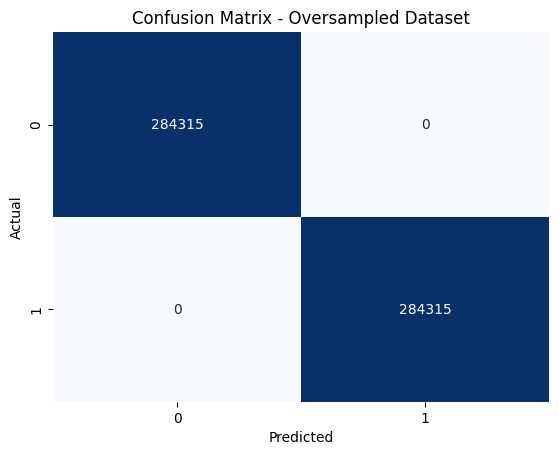

In [ ]:
# Fit and evaluate on the 'oversampled' dataset
xgboost_model_dev.fit_and_evaluate('oversampled')

Accuracy on smote dataset: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      1.00      1.00    284315

    accuracy                           1.00    568630
   macro avg       1.00      1.00      1.00    568630
weighted avg       1.00      1.00      1.00    568630



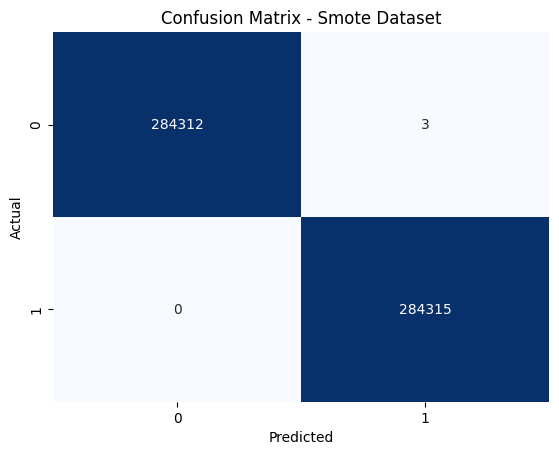

In [ ]:
# Fit and evaluate on the 'smote' dataset
xgboost_model_dev.fit_and_evaluate('smote')

**6.5.1 Conclusion on XGBoost Classifier Model**

The XGBoost model performed well on all balanced and imbalanced datasets, achieving a perfect score. Further verification must be done to confirm if the model is not overfitting.

**6.6 SVM Classifier Model**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

class SVMModelDevelopment:

    def __init__(self, X_normal, y_normal, X_scaled, y_scaled, X_under, y_under, X_over, y_over, X_smote, y_smote, kernel='linear'):
        # Initialize the datasets
        self.datasets = {
            'normal': (X_normal, y_normal),
            'scaled': (X_scaled, y_scaled),
            'undersampled': (X_under, y_under),
            'oversampled': (X_over, y_over),
            'smote': (X_smote, y_smote)
        }
        # Initialize SVM classifier with a specified kernel (default is 'linear')
        self.model = SVC(kernel=kernel)

    def fit_and_evaluate(self, dataset_type='normal'):
        # Fit the SVM model and evaluate it on the chosen dataset
        X, y = self.datasets[dataset_type]
        self.model.fit(X, y)
        y_pred = self.model.predict(X)

        # Output accuracy and classification report
        accuracy = accuracy_score(y, y_pred)
        print(f"Accuracy on {dataset_type} dataset: {accuracy:.4f}")
        print(classification_report(y, y_pred))

        # Confusion matrix visualization
        cm = confusion_matrix(y, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - {dataset_type.capitalize()} Dataset')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

In [ ]:
# Example usage with preprocessed datasets (X_normal, y_normal, X_scaled, y_scaled, etc.)
svm_model_dev = SVMModelDevelopment(X_normal, y_normal, X_scaled, y_scaled, X_under, y_under, X_over, y_over, X_smote, y_smote, kernel='rbf')

Accuracy on normal dataset: 0.9988
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.83      0.39      0.53       492

    accuracy                           1.00    284807
   macro avg       0.91      0.70      0.77    284807
weighted avg       1.00      1.00      1.00    284807



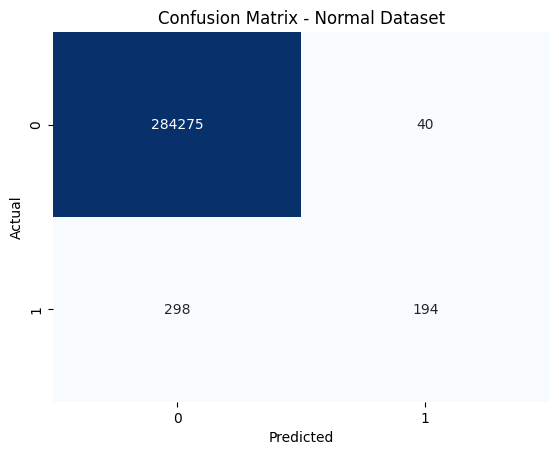

In [ ]:
# Fit and evaluate on the 'normal' dataset
svm_model_dev.fit_and_evaluate('normal')

Accuracy on scaled dataset: 0.9996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.98      0.81      0.89       492

    accuracy                           1.00    284807
   macro avg       0.99      0.90      0.94    284807
weighted avg       1.00      1.00      1.00    284807



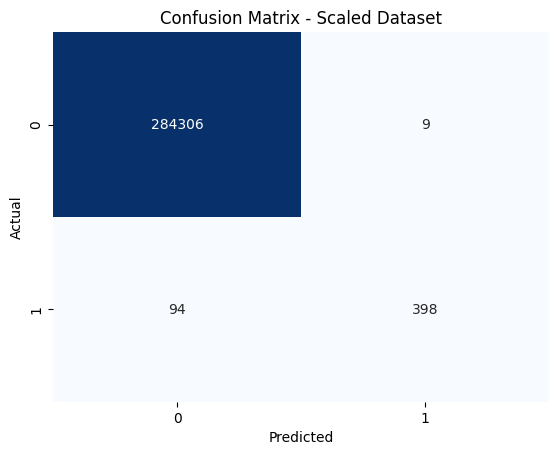

In [ ]:
# Fit and evaluate on the 'scaled' dataset
svm_model_dev.fit_and_evaluate('scaled')

Accuracy on undersampled dataset: 0.8343
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       492
           1       0.92      0.74      0.82       492

    accuracy                           0.83       984
   macro avg       0.85      0.83      0.83       984
weighted avg       0.85      0.83      0.83       984



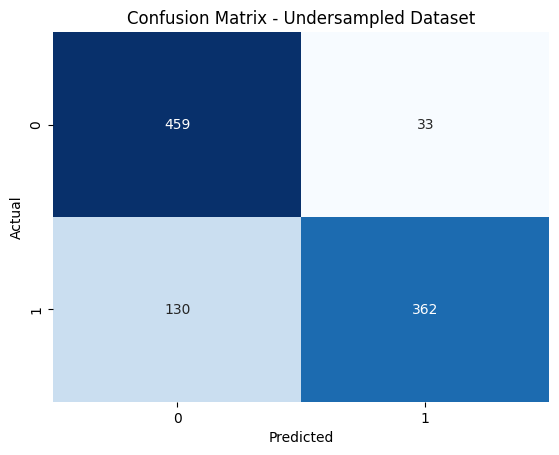

In [ ]:
# Fit and evaluate on the 'undersampled' dataset
svm_model_dev.fit_and_evaluate('undersampled')

In [ ]:
# Fit and evaluate on the 'oversampled' dataset
svm_model_dev.fit_and_evaluate('oversampled')

**The SVM model for oversampled dataset was taking too much time to run **

In [ ]:
# Fit and evaluate on the 'smote' dataset
svm_model_dev.fit_and_evaluate('smote')

**The SVM model for smote dataset was taking too much time**

**6.5.1 Conclusion on SVM Classifier Model**

The best accuracy and fraud detection results are observed when we scale the dataset due to its unbalanced nature. However, the undersampled dataset offered a balanced performance with slightly lower overall accuracy, which gave us a better reason to handle the class imbalance.



# **7 Model Comparison**

The accuracies for each of the model based on the data handling technique were passed as a dictionary

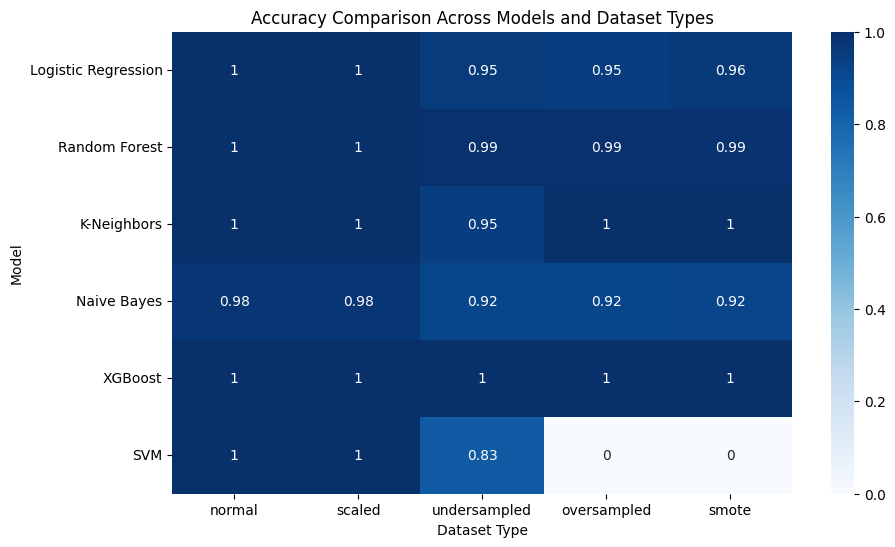

In [ ]:
class ModelComparison:

    def __init__(self):
        # Store accuracies for each model and dataset type
        self.results = {
            'Logistic Regression': {'normal': 0.9992, 'scaled': 0.9992, 'undersampled': 0.9543, 'oversampled': 0.9490, 'smote': 0.9598},
            'Random Forest': {'normal': 0.9997, 'scaled': 0.9997, 'undersampled': 0.9898, 'oversampled': 0.9926, 'smote': 0.9867},
            'K-Neighbors': {'normal': 0.9995, 'scaled': 0.9997, 'undersampled': 0.9472, 'oversampled': 0.9999, 'smote': 0.9995},
            'Naive Bayes': {'normal': 0.9778, 'scaled': 0.9778, 'undersampled': 0.9177, 'oversampled': 0.9171, 'smote': 0.9188},
            'XGBoost': {'normal': 1.0, 'scaled': 1.0, 'undersampled': 1.0, 'oversampled': 1.0, 'smote': 1.0},
            'SVM': {'normal': 0.9988, 'scaled': 0.9996, 'undersampled': 0.8343, 'oversampled': 0.0, 'smote': 0.0}
        }

    def visualize_results(self):
        # Prepare data for heatmap visualization
        model_names = list(self.results.keys())
        dataset_types = list(self.results[model_names[0]].keys())
        accuracy_data = [[self.results[model].get(dataset, 0) for dataset in dataset_types] for model in model_names]

        # Display heatmap of accuracies
        plt.figure(figsize=(10, 6))
        sns.heatmap(accuracy_data, annot=True, cmap="Blues", xticklabels=dataset_types, yticklabels=model_names)
        plt.title("Accuracy Comparison Across Models and Dataset Types")
        plt.xlabel("Dataset Type")
        plt.ylabel("Model")
        plt.show()

# Run the visualization
comparison = ModelComparison()
comparison.visualize_results()

# **8.0 Conclusion**

In Conclusion, data handling techniques such as scaling, oversampling, and SMOTE generally improved model performance, with XGBoost and Random Forest giving the best result across all data handling techniques.